### Clear Sky

In [20]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import bisect
import datetime
from scipy import interpolate
from matplotlib.dates import DateFormatter

# User defined functions
from load_data_from_csv import *

#### Import  Data

In [21]:
day = '2018-10-12'   # select day of observation ('2018-10-12' : camera 2, sw-vers. 3)
s_time = ' 07:00:00' # beginning of observation
e_time = ' 20:00:00' # end of observation
start = day + s_time
end   = day + e_time

#### Weather station at Luzern Switzerland

In [22]:
luz_csv = r'irradiation_luz_2017_2018.csv'

df_lu = process_LUZ(luz_csv)
df_lu.set_index(df_lu.datetime, inplace=True)
df = df_lu['gre000z0']       # 10 min mean in W/m² 
lu_rad = df.loc[start:end]   # set distinct observation day
lu_rad.to_csv('lu_rad.csv')

#lu_rad.dtypes
#lu_rad.index.min()
#lu_rad.index.max()

lu_rad.head(n=2)

datetime
2018-10-12 07:00:00+02:00    0.0
2018-10-12 07:10:00+02:00    0.0
Freq: 10T, Name: gre000z0, dtype: float64

#### Clear Sky solar irradiance from SODA using McClear model
Source: http://www.soda-pro.com/web-services/radiation/cams-mcclear

In [23]:
soda_csv = r'irradiation_soda_2017_2018_1min.csv'

df_soda = process_SODA(soda_csv)
df = df_soda['Clear sky GHI']*60 # given in units of Wh/m² 
mc_rad = df.loc[start:end]       # set distinct observation day

mc_rad.head(n=2)

datetime
2018-10-12 07:00:00+02:00    0.0
2018-10-12 07:10:00+02:00    0.0
Name: Clear sky GHI, dtype: float64

#### Solar measurements vs. McClear model

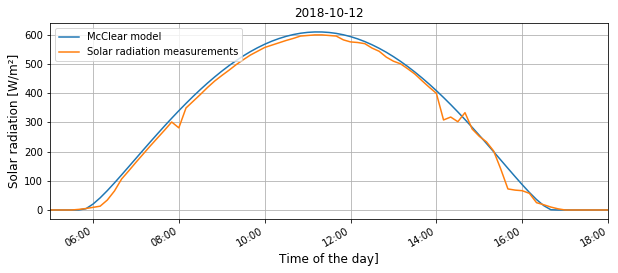

In [24]:
fig = plt.figure(1, figsize=(10,4))
mc_rad.plot(label='McClear model')
lu_rad.plot(label='Solar radiation measurements')

#mc_rad.plot(dateaxis, mc_rad, 'm', label='McClear model')
#lu_rad.plot(dateaxis, lu_rad, 'r', label='Solar radiation measurements')
plt.xlabel('Time of the day]', fontsize=12)
plt.ylabel('Solar radiation [W/m²]', fontsize=12)
plt.legend(loc='upper left')
plt.grid(b=None, which='major', axis='both')
plt.title(day)
fig.autofmt_xdate()
formatter = DateFormatter('%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)

# localized datetime not shown !
